# Générateur de mot

### Import

In [13]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Récupération des données
fichier = open("./ProjetPython/notredame.txt", "r")

# Lecture du text
text = fichier.read()

# Suppression des caractères spéciaux et les chiffres
list_str = [chr(c) for c in range(65,91)]+[chr(c) for c in range(97,123)]+[" "]
text = ''.join([c if c in list_str else ' ' for c in text])

# On enlève les espaces en trop
text = ' '+' '.join(text.split())

# Et on downcase le text restant
text = text.lower()

print(text)


 the project gutenberg ebook of notre dame de paris by victor hugo this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org title notre dame de paris author victor hugo release date october ebook language french start of this project gutenberg ebook notre dame de paris produced by chuck greif and ebooksgratuits com victor hugo notre dame de paris table des mati res pr face note ajout e l dition d finitive livre premier i la grand salle ii gringoire iii monsieur le cardinal iv ma tre jacques coppenole v quasimodo vi la esmeralda livre deuxi me i de charybde en scylla ii la place de gr ve iii besos para golpes iv les inconv nients de suivre une jolie femme le soir dans les rues v suite des inconv nients vi la cruche cass e vii une nuit de noces livre troisi me i notre dame ii paris vol d oiseau livre q

In [14]:
nbAppear = dict()

def lireDict(dictionnaire,clef):
    if (clef in dictionnaire.keys()):
        return dictionnaire[clef]
    return None

def mange(text):
    global nbAppear
    for i in range(0,len(text)-1):
        premiereLettre = lireDict(nbAppear,text[i])
        if premiereLettre != None :
            secondeLettre = lireDict(premiereLettre,text[i+1])
            if secondeLettre != None :
                nbAppear[text[i]][text[i+1]] += 1
            else :
                nbAppear[text[i]] = {**nbAppear[text[i]], **{text[i+1]: 1}}
        else :
            nbAppear = {**nbAppear, **{text[i]:{text[i+1]: 1}}}

'''
def mangeMieux(text, nb):
    global nbAppear
    

'''
mange(text)
print(nbAppear)

{' ': {'t': 12895, 'p': 14718, 'g': 3893, 'e': 15848, 'o': 3801, 'n': 4955, 'd': 22805, 'b': 4410, 'v': 6318, 'h': 2182, 'i': 5234, 'f': 5877, 'u': 5025, 'a': 12335, 'c': 15523, 'w': 208, 'r': 7544, 'y': 961, 'm': 9296, 'l': 20771, 's': 15462, 'j': 3421, 'q': 7308, 'x': 81, 'k': 16, 'z': 36}, 't': {'h': 669, ' ': 29628, 'e': 8827, 'r': 5092, 'o': 3605, 'i': 3623, 's': 1123, 'l': 8, 'a': 4791, 'u': 1373, 't': 1921, 'y': 44, 'c': 22, 'f': 13, 'm': 68, 'q': 1, 'n': 2, 'x': 1, 'p': 8, 'd': 1, 'w': 1}, 'h': {'e': 2398, 'u': 426, 'i': 1100, ' ': 1397, 'a': 2466, 'o': 1338, 't': 29, 'y': 55, 'r': 58, 'l': 3, 'm': 3, 's': 3}, 'e': {' ': 55348, 'c': 1928, 'n': 14013, 'r': 7963, 'b': 350, 's': 16014, 'v': 1032, 'd': 493, 'l': 4686, 'a': 1160, 'i': 1329, 'm': 3098, 'u': 6173, 't': 7647, 'p': 813, 'f': 650, 'z': 1056, 'o': 100, 'q': 117, 'h': 261, 'x': 461, 'g': 458, 'j': 18, 'y': 11, 'k': 2, 'e': 68, 'w': 9}, 'p': {'r': 3023, 'a': 4966, 'y': 48, 'p': 792, 'e': 3067, 'l': 2199, 's': 409, 'o': 3106

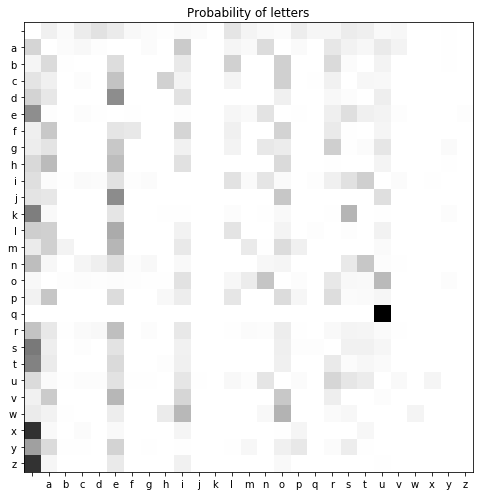

In [15]:
all_letter = sorted([key for key in nbAppear.keys()])
data = np.matrix([[0. for y in range(0,len(all_letter))] for x in range(0,len(all_letter))])
probData = data.copy()


i = 0
for letter1 in all_letter:
    y = 0
    for letter2 in all_letter:
        if letter2 in nbAppear[letter1].keys():
            data[i,y] = nbAppear[letter1][letter2]
        else :
            data[i,y] = 0
        y+=1
    i+=1


somm = [x.sum() for x in data]
for i in range(0,len(somm)) :
    for y in range(0,len(somm)) :
        probData[i,y] = (float(data[i,y])*100.0)/float(somm[i])
        

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(probData, cmap=cm.binary)

ax.set_xticks(np.arange(len(all_letter)))
ax.set_yticks(np.arange(len(all_letter)))

ax.set_xticklabels(all_letter)
ax.set_yticklabels(all_letter)

ax.set_title("Probability of letters")
fig.tight_layout()
plt.show()

In [16]:
def findLetter(c):
    i = 0
    y = all_letter.index(c)
    r = random.randint(0,somm[y])
    while(r>data[i,y]):
        r-=data[i,y]
        i+=1
    return all_letter[i]


def generator():
    mot = ""+findLetter(' ')
    while(mot[-1]!=' '):
        mot+=findLetter(mot[-1])
    return mot


def generatorT(t):
    mot = ""+findLetter(' ')
    for i in range(1,t):
        l = findLetter(mot[-1])
        while(l==' '):
            l = findLetter(mot[-1])
        mot+=l
    return mot


#print(data)
for i in range(0,20):
    print("mot aléatoire   : "+generator())
t = 5
for i in range(0,0):
    print("mot de taille "+str(t)+": "+generatorT(t))

mot aléatoire   : ip 
mot aléatoire   : s 
mot aléatoire   : uovarah 
mot aléatoire   : eruel 
mot aléatoire   : xudrtne 
mot aléatoire   : ev 
mot aléatoire   : sem 
mot aléatoire   : tporg 
mot aléatoire   : ennian 
mot aléatoire   : g 
mot aléatoire   : efop 
mot aléatoire   : d 
mot aléatoire   : el 
mot aléatoire   : ej 
mot aléatoire   : nesemmeua 
mot aléatoire   : tp 
mot aléatoire   : iamiapmahciep 
mot aléatoire   : egnoc 
mot aléatoire   : rav 
mot aléatoire   : euq 
